In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import welch, lfilter
from scipy import fftpack

In [2]:
def plot_time_domain_channels_stereo(time, lc, rc):
    #Plota as figuras ao longo do tempo
    #Plota os canais esquerdo e direito
    plt.figure(1,figsize=(20, 5))
    plt.plot(time, lc, label="Canal esquerdo")
    plt.legend()
    plt.xlabel("Tempo [s]")
    plt.ylabel("Amplitude")
    plt.show()

    plt.figure(2,figsize=(20, 5))
    plt.plot(time, rc, color="red",label="Canal direito")
    plt.legend()
    plt.xlabel("Tempo [s]")
    plt.ylabel("Amplitude")
    plt.show()

In [3]:
def plot_spect_welch_channels_stereo(lc, rc, fs):
    #Sample Frequencies, Power Spectral Density
    sf_lc, psd_lc = welch(
        x=lc, 
        fs=fs, 
        window='flattop', 
        nperseg=512, 
        scaling='spectrum'
    )
    sf_rc, psd_rc = welch(
        x=rc, 
        fs=fs, 
        window='flattop', 
        nperseg=512, 
        scaling='spectrum'
    )

    #Plota o espectro do sinal para frequencias normalizadas entre 0 1 pi 
    #(frequencias positivas)
    plt.subplots(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.semilogy(sf_lc, psd_lc, label="Canal esquerdo")
    plt.legend()
    plt.xlabel('Frequencia [rad]')
    plt.ylabel('Espectro')

    plt.subplot(1, 2, 2)
    plt.semilogy(sf_rc, psd_rc, color="red", label="Canal direito")
    plt.legend()
    plt.xlabel('Frequencia [rad]')
    plt.ylabel('Espectro')
    plt.show()

In [60]:
def plot_spect_fft_channels_stereo(lc,rc, n, t):
    freq_lc = np.linspace(0.0, 1.0//(2.0*t), n//2) #Interpola para determinar eixo da frequencia
    sig_fft_lc = fftpack.fft(lc)
    plt.figure(3, figsize=(20,5))    
    #plt.title("Canal esquerdo")
    plt.plot(freq_lc, 2.0/n * np.abs(sig_fft_lc[0:n//2]), label="Canal esquerdo")
    plt.legend()
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Espectro de amplitudes')
    plt.legend()

    freq_rc = np.linspace(0.0, 1.0//(2.0*t), n//2) #Interpola para determinar eixo da frequencia
    sig_fft_rc = fftpack.fft(rc)
    plt.figure(4, figsize=(20,5))
    #plt.title("Canal direito")
    plt.plot(freq_rc, 2.0/n * np.abs(sig_fft_rc[0:n//2]), color="red", label="Canal direito")
    plt.legend()
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Espectro de amplitudes')
    plt.legend()
    plt.show()
    return freq_lc, sig_fft_lc, freq_rc, sig_fft_lc

In [5]:
#Carrega o arquivo
sampling_rate, data = wavfile.read('569127__josefpres__dark-loops-201-simple-mix-2-short-loop-60-bpm.wav')
#sampling_rate, data = wavfile.read('581010__xcreenplay__smoking-in-the-angel-section2.wav')

number_of_samples = data.shape[0]
number_of_channels = data.shape[1]

#Tempo total = numero de amostras / fs
duration = number_of_samples / sampling_rate

#Carrega o arquivo em dois canais (audio estereo)
left_channel = data[:, 0]
right_channel  = data[:, 1]

print(f"Numero de canais = {number_of_channels}")
print(f"Duracao = {duration}s")
print(f'Numero de amostras: {number_of_samples}')
print(f"Amostras por segundo: {sampling_rate}Hz")


Numero de canais = 2
Duracao = 64.0s
Numero de amostras: 2822400
Amostras por segundo: 44100Hz


/tmp/ipykernel_329935/1384073729.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read('569127__josefpres__dark-loops-201-simple-mix-2-short-loop-60-bpm.wav')


# Plote o sinal no domínio do tempo.

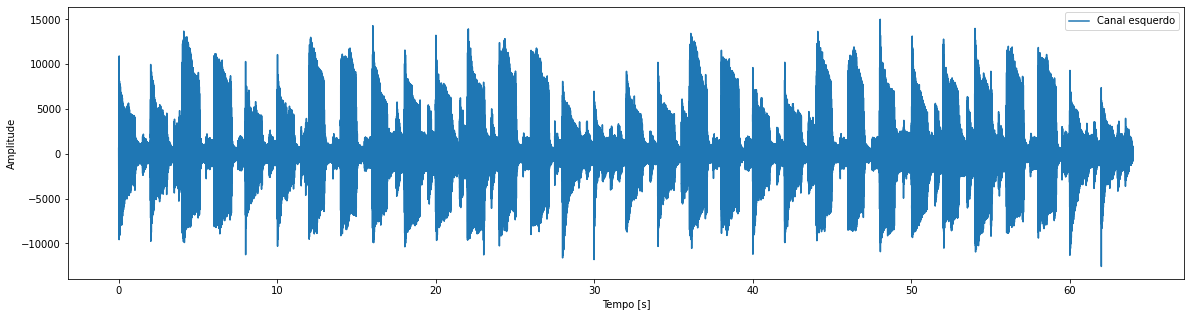

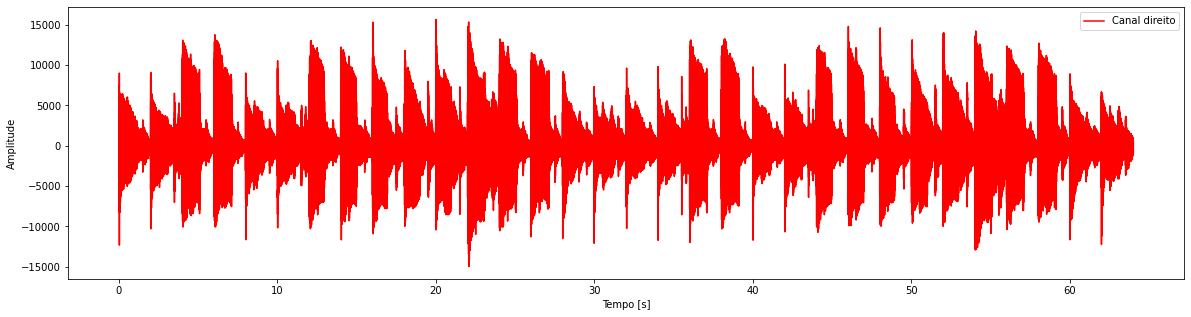

In [6]:
#Interpola para determinar eixo do tempo
time = np.linspace(0., duration, number_of_samples)
plot_time_domain_channels_stereo(
    time=time,
    lc=left_channel,
    rc=right_channel
)

# Plote o espectro de frequências do sinal e no domínio do tempo para as primeiras N amostras. 

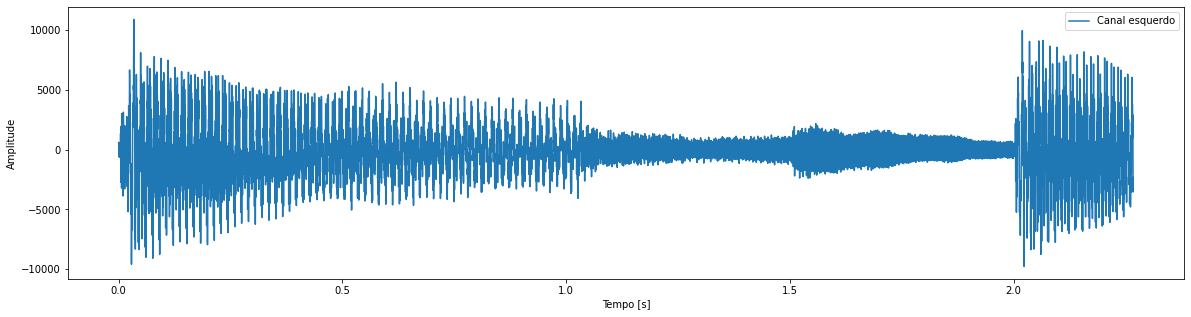

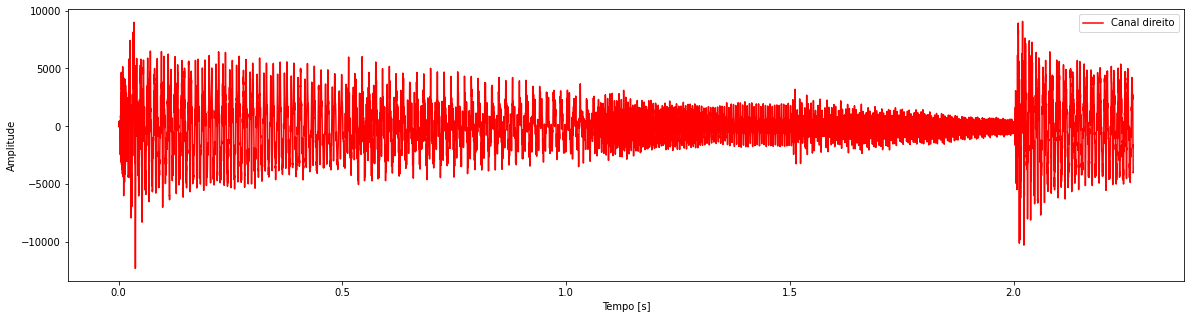

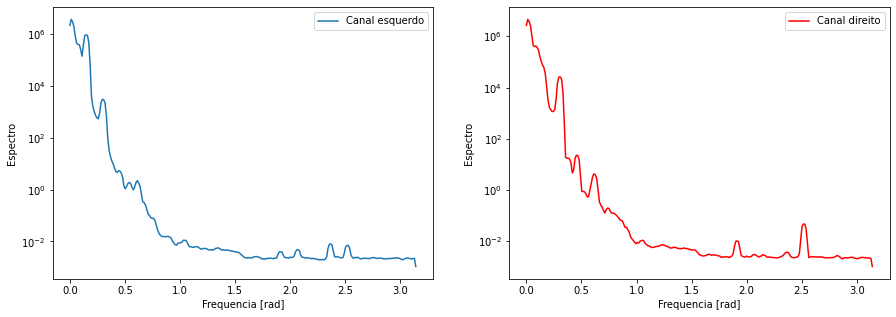

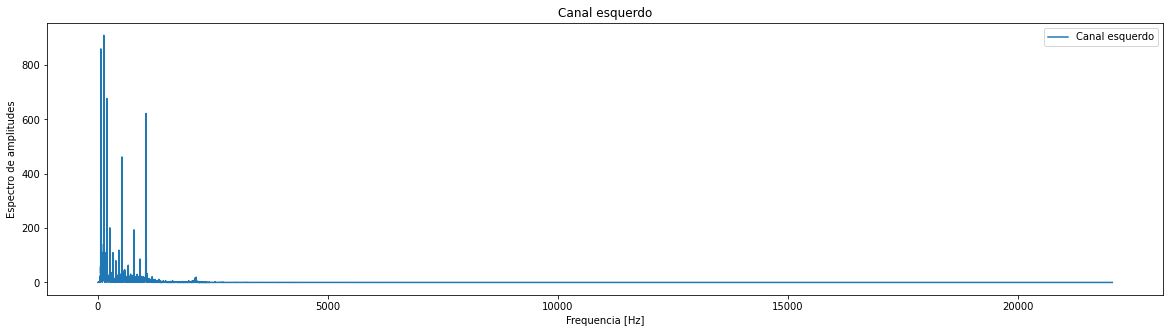

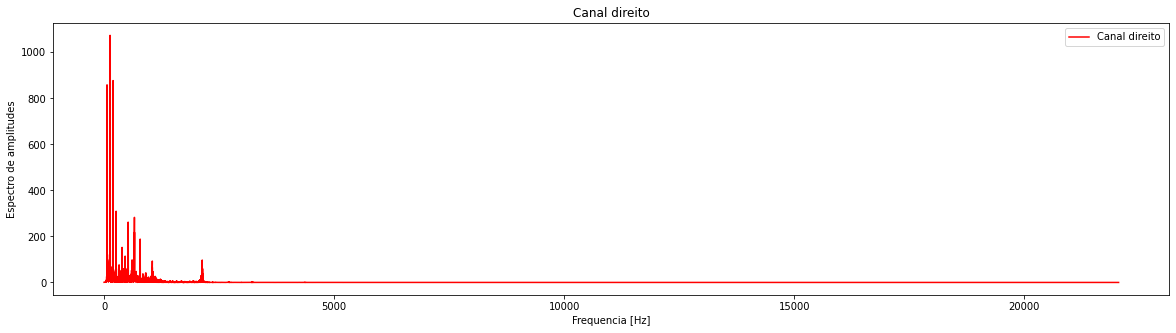

In [7]:
N = 100000 #Numero de Amostras escolhidos
T = time[1] - time[0] # sample spacing
plot_time_domain_channels_stereo(
    time=time[0:N],
    lc=left_channel[0:N],
    rc=right_channel[0:N]
)
plot_spect_welch_channels_stereo(
    lc  = left_channel[0:N],
    rc  = right_channel[0:N],
    fs = (2*np.pi)
)
return_amost_n = plot_spect_fft_channels_stereo(
    lc  = left_channel[0:N],
    rc  = right_channel[0:N],
    n=N,
    t=T
)

# Projeto de um filtro digital passa-baixas com resposta ao impul sofinita (FIR) que corta a metade do conteúdo espectral do arquivo de áudio

0.5000962076884111
330.00089214915823


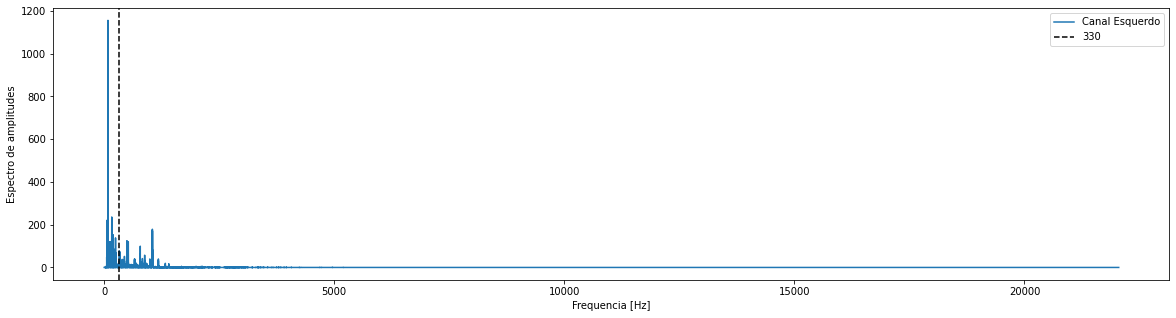

0.5000010169294309
395.5604652497628


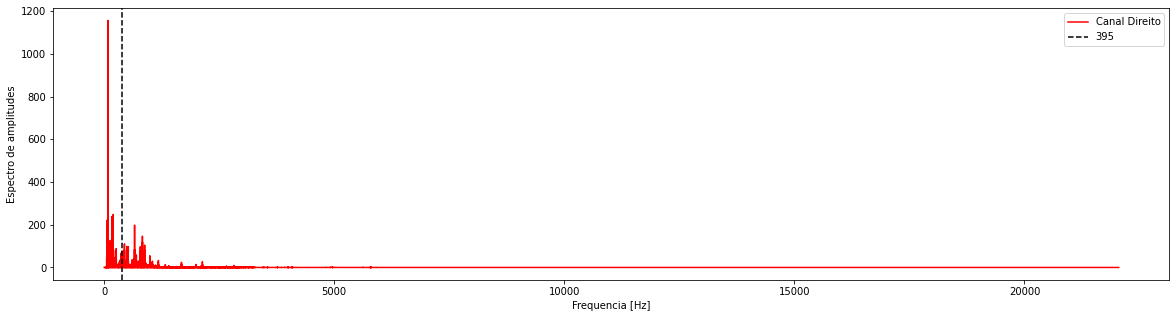

In [59]:
freq_lc = np.linspace(0.0, 1.0//(2.0*T), number_of_samples//2) #Interpola para determinar eixo da frequencia
sig_fft_lc = fftpack.fft(left_channel)

plt.figure(1,figsize=(20, 5))
plt.plot(freq_lc, 2.0/number_of_samples * np.abs(sig_fft_lc[:number_of_samples//2]), label="Canal Esquerdo")
#"centro de massa" da função no domínio da frequência 
peso_lc = 0.0 #porcentagem do sinal acumulado
rangeData_lc = len(sig_fft_lc)//2 #frequências positivas da FFT 
sc_lc = sum(abs(sig_fft_lc[:rangeData_lc])) #todo o sinal acumulado 
count_lc = 0 # quantidade de amostras somadas

for i in abs(sig_fft_lc[:rangeData_lc]):
  peso_lc = peso_lc + i/sc_lc
  count_lc = count_lc + 1
  if(peso_lc >= 0.5):
    print(peso_lc)
    break
print(freq_lc[count_lc]) #frequência de corte para o primeiro canal

#plt.title("Canal Esquerdo")
plt.axvline(x = freq_lc[count_lc], color = 'black', ls = '--', label=f"{int(freq_lc[count_lc])}")
plt.legend()
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Espectro de amplitudes')
plt.show()


freq_rc = np.linspace(0.0, 1.0//(2.0*T), number_of_samples//2) #Interpola para determinar eixo da frequencia
sig_fft_rc = fftpack.fft(right_channel)

plt.figure(2,figsize=(20, 5))
plt.plot(freq_rc, 2.0/number_of_samples * np.abs(sig_fft_rc[:number_of_samples//2]), color='red', label="Canal Direito")

peso_rc = 0.0 
rangeData_rc = len(sig_fft_rc)//2 
sc_rc = sum(abs(sig_fft_rc[:rangeData_rc])) 
count_rc = 0 

for i in abs(sig_fft_rc[:rangeData_rc]):
  peso_rc = peso_rc + i/sc_rc
  count_rc = count_rc + 1
  if(peso_rc >= 0.5):
    print(peso_rc)
    break
print(freq_rc[count_rc])

#plt.title("Canal Direito")
plt.axvline(x = freq_rc[count_rc], color = 'black', ls = '--', label=f"{int(freq_rc[count_rc])}")
plt.legend()
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Espectro de amplitudes')
plt.show()

In [9]:
aux = (2.0/number_of_samples * np.abs(sig_fft_lc[:number_of_samples//2])).cumsum()
half = aux[-1] / 2
value_half = aux[aux >= half][0]
freq_half = freq_lc[aux >= value_half][0]
print("Frequência de metade do conteúdo espectral: ", freq_half, " Hz")

Frequência de metade do conteúdo espectral:  329.9852678467034  Hz


In [10]:
aux = (2.0/number_of_samples * np.abs(sig_fft_rc[:number_of_samples//2])).cumsum()
half = aux[-1] / 2
value_half = aux[aux >= half][0]
freq_half = freq_rc[aux >= value_half][0]
print("Frequência de metade do conteúdo espectral: ", freq_half, " Hz")

Frequência de metade do conteúdo espectral:  395.54484094730793  Hz


## Coeficientes do filtro projeto no PyFDA

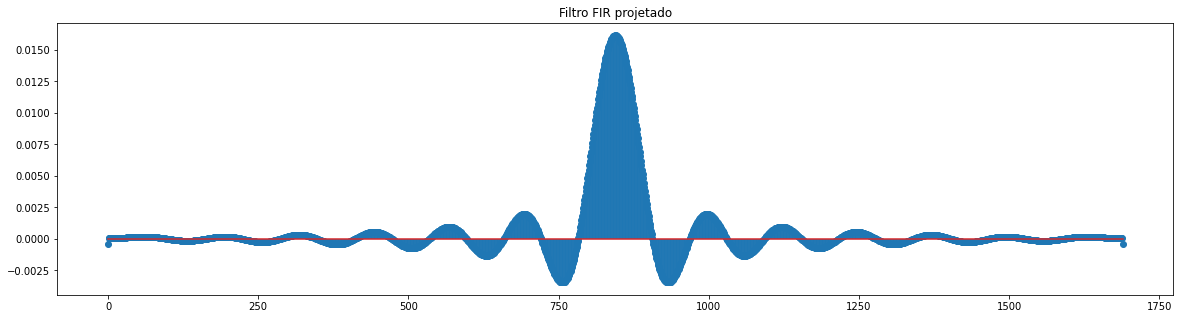

In [26]:
#Carrega os coeficientes do filtro
b = np.genfromtxt('coeffs_pyfda_lp_330_395.csv', delimiter=',')
#Plota coeficientes do filtro FIR
plt.figure(7, figsize=(20, 5))
plt.title("Filtro FIR projetado")
plt.stem(b)
plt.show()

## Implemente a filtragem com a operação de convolução no domínio da frequência ( Método de sobreposição e soma)

In [27]:
def sum_cov(in_signal, filter):
    signal_size = len(in_signal)
    out_signal = [0 for i in range(signal_size)]
    for n in range(signal_size):
        sum = 0
        for k in range(len(filter)):
            sum += in_signal[n-k] * filter[k]
        out_signal[n] = sum
    return out_signal

In [28]:
#Filtra os dados dos canais esquerdo e direito
filtered_lc = sum_cov(left_channel[0:N], b)
filtered_rc = sum_cov(right_channel[0:N], b)

In [30]:
#Dizimando o sinal pelo fator M
M=2

decimated_lc = filtered_lc[0:-1:M]
decimated_rc = filtered_rc[0:-1:M]

# Plot os conteúdos espectrais (filtrados e dizimados)

Filtrados


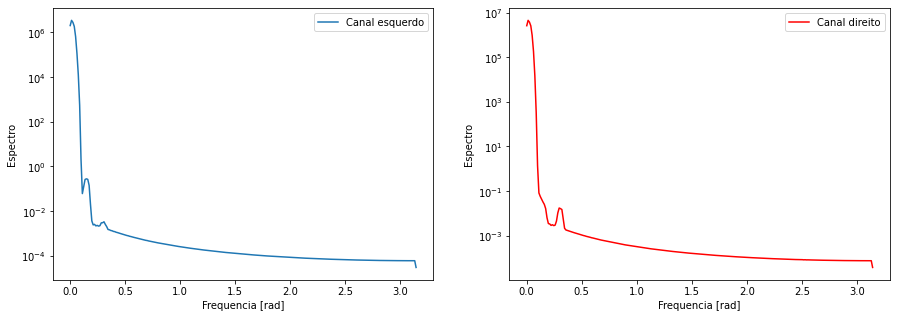

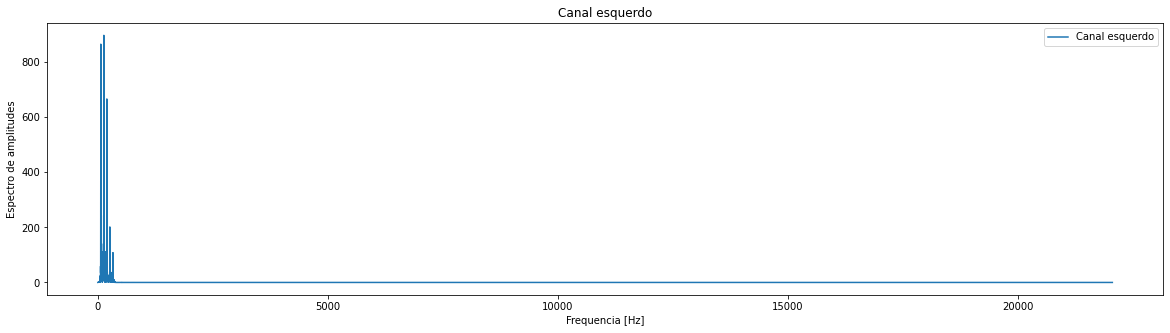

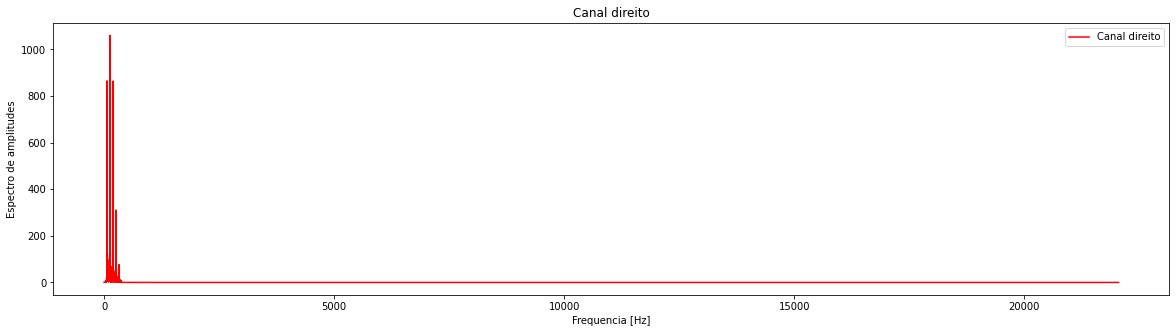

Dizimados


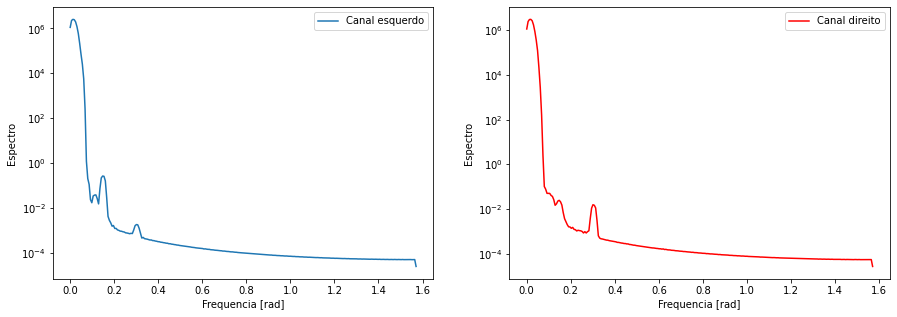

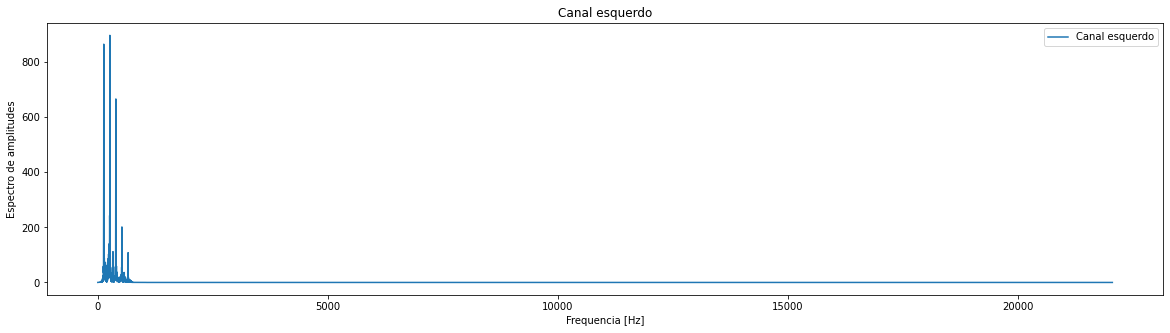

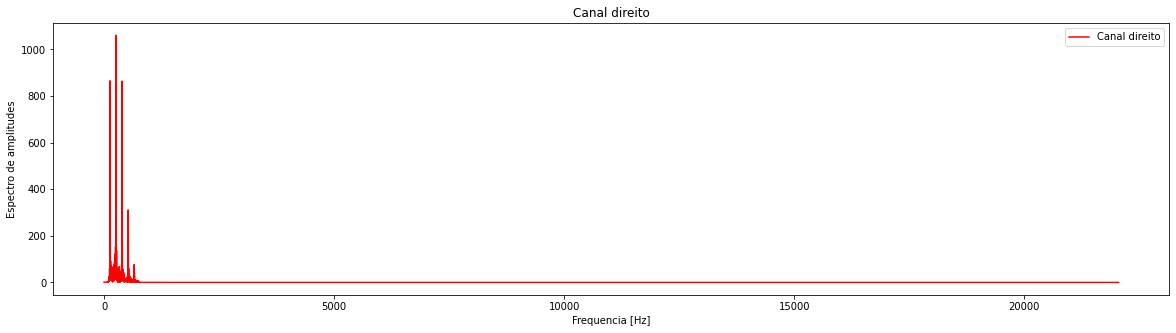

In [31]:
print("Filtrados")
plot_spect_welch_channels_stereo(
    lc  = filtered_lc,
    rc  = filtered_rc,
    fs = (2*np.pi)
)

return_filtered = plot_spect_fft_channels_stereo(
    lc  = filtered_lc,
    rc  = filtered_rc,
    n=N,
    t=T
)

print("Dizimados")
plot_spect_welch_channels_stereo(
    lc  = decimated_lc,
    rc  = decimated_rc,
    fs = (2*np.pi)/M
)

return_decimated = plot_spect_fft_channels_stereo(
    lc  = decimated_lc,
    rc  = decimated_rc,
    n=N//M,
    t=T
)



Parte filtrada


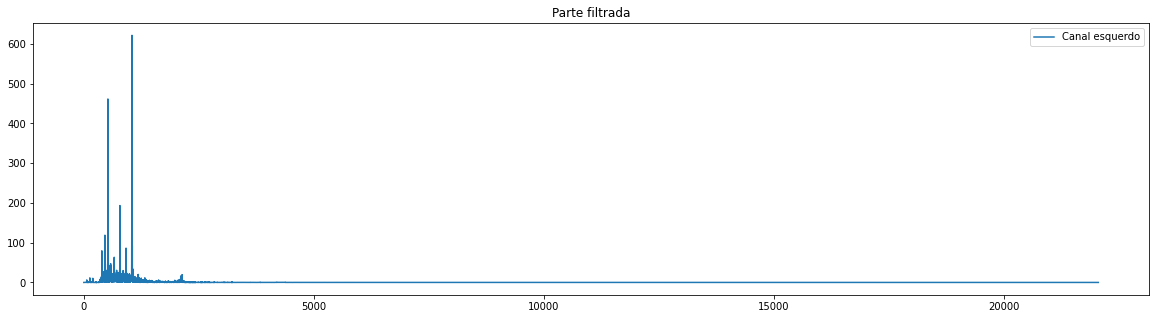

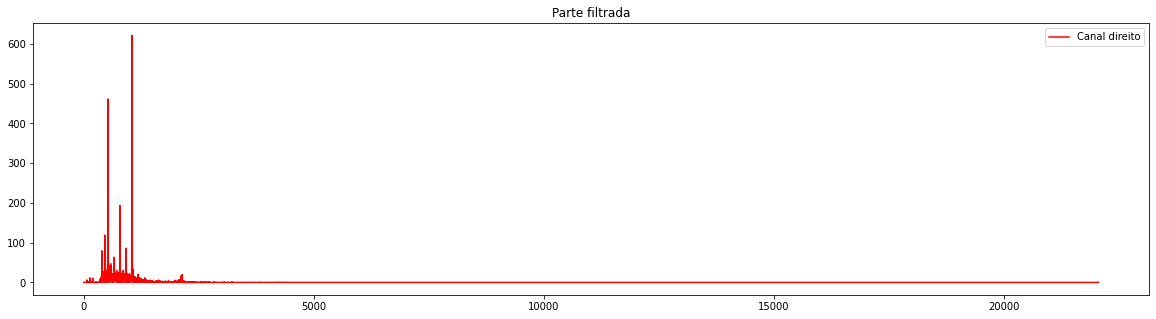

In [55]:
print("Parte filtrada")
pf_lc = abs(return_amost_n[1])- abs(return_filtered[1])
pf_rc = abs(return_amost_n[3])- abs(return_filtered[3])
x = np.linspace(0.0, 1.0//(2*T), N//2)
plt.figure(1, figsize=(20,5))
plt.title("Parte filtrada")
plt.plot(x, 2.0/N * np.abs(pf_lc[:N//2]), label="Canal esquerdo")
plt.legend()

plt.figure(2, figsize=(20,5))
plt.title("Parte filtrada")
plt.plot(x, 2.0/N * np.abs(pf_rc[:N//2]),color="red",label="Canal direito")
plt.legend()

In [34]:
filtered_time_domain_lc = fftpack.ifft(filtered_lc)
filtered_time_domain_rc = fftpack.ifft(filtered_rc)

decimated_time_domain_lc = fftpack.ifft(decimated_lc)
decimated_time_domain_rc = fftpack.ifft(decimated_rc)

# Plot os conteúdos temporais (filtrados e dizimados)

Filtrado


/home/hemerson/.cache/pypoetry/virtualenvs/pds-vmrzwVap-py3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/hemerson/.cache/pypoetry/virtualenvs/pds-vmrzwVap-py3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


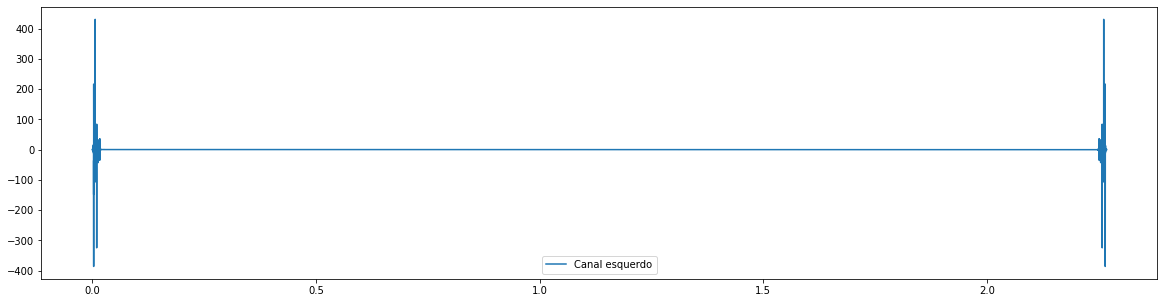

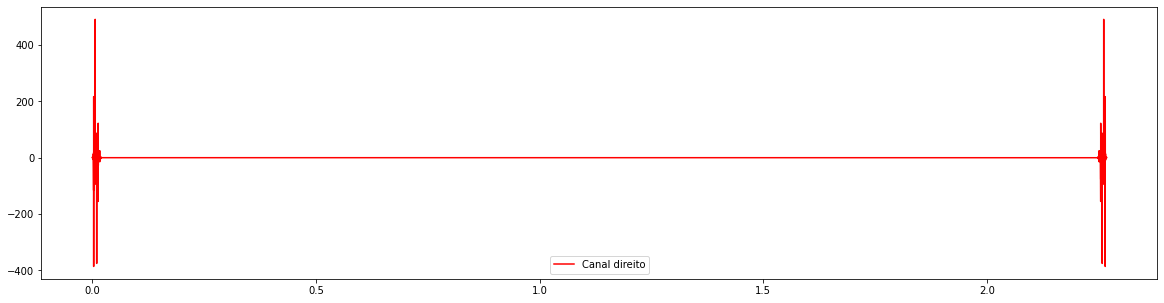

In [77]:
print("Filtrado")
tam1 = len(filtered_time_domain_lc)
x1 = np.linspace(0.0, tam1/sampling_rate, tam1)
plt.figure(1, figsize=(20,5))
plt.plot(x1,filtered_time_domain_lc, label="Canal esquerdo")
plt.legend()

tam2 = len(filtered_time_domain_rc)
x2 = np.linspace(0.0, tam2/sampling_rate, tam1)
plt.figure(2, figsize=(20,5))
plt.plot(x2,filtered_time_domain_rc,color="red",label="Canal direito")
plt.legend()

Dizimado


/home/hemerson/.cache/pypoetry/virtualenvs/pds-vmrzwVap-py3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/hemerson/.cache/pypoetry/virtualenvs/pds-vmrzwVap-py3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


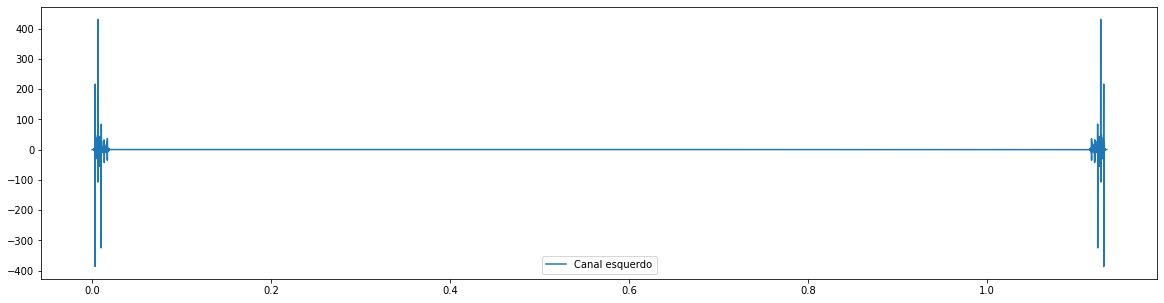

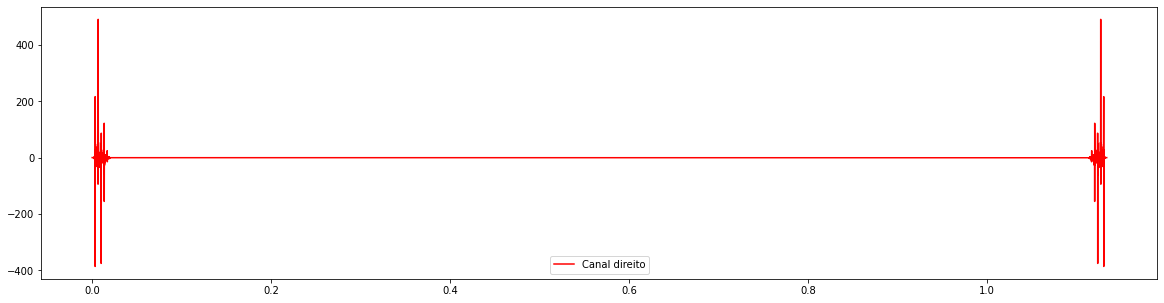

In [76]:
print("Dizimado")
tam1 = len(decimated_time_domain_lc)
x1 = np.linspace(0.0, tam1/sampling_rate, tam1)
plt.figure(1, figsize=(20,5))
plt.plot(x1,decimated_time_domain_lc, label="Canal esquerdo")
plt.legend()

tam2 = len(decimated_time_domain_rc)
x2 = np.linspace(0.0, tam2/sampling_rate, tam1)
plt.figure(2, figsize=(20,5))
plt.plot(x2,decimated_time_domain_rc,color="red",label="Canal direito")
plt.legend()